In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(0)


In [2]:
data=pd.read_csv(r"c:\Users\acer\Desktop\FuelConsumption.csv")

In [6]:
X=data[['ENGINESIZE','FUELCONSUMPTION_COMB']]
Y=data[['CO2EMISSIONS']]
print(X[['ENGINESIZE']].values.min())
print(X[['ENGINESIZE']].values.max())


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

from sklearn.svm import SVR

svrR = SVR()
svrL = SVR(kernel='linear')
svrP = SVR(kernel='poly',degree=1)

svrR.fit(xtrain,ytrain.values.ravel())
svrL.fit(xtrain,ytrain.values.ravel())
svrP.fit(xtrain,ytrain.values.ravel())

yhatR=svrR.predict(xtest)
yhatL=svrL.predict(xtest)
yhatP=svrP.predict(xtest)

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

print(f"========RBF=============")
print("MSR: ",mean_squared_error(yhatR,ytest.values.ravel()))
print("R2_Score:",r2_score(yhatR,ytest.values.ravel()))

print(f"=========Linear===========")
print("MSR: ",mean_squared_error(yhatL,ytest.values.ravel()))
print("R2_Score:",r2_score(yhatL,ytest.values.ravel()))

print(f"==========Poly==============")
print("MSR: ",mean_squared_error(yhatP,ytest.values.ravel()))
print("R2_Score:",r2_score(yhatP,ytest.values.ravel()))


1.0
8.4
========RBF=============
MSR:  677.8990859835736
R2_Score: 0.7659275734447375
=========Linear===========
MSR:  1620.2184267485227
R2_Score: 0.7598444235313728
==========Poly==============
MSR:  888.9722939531265
R2_Score: 0.8144385857890487


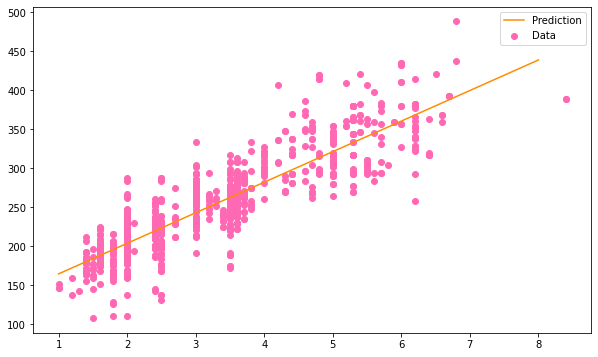

In [11]:
import matplotlib.pyplot as plt

svrR = SVR()
svrL = SVR(kernel='linear',C=150,epsilon=8)
svrP = SVR(kernel='poly',degree=1)

svrR.fit(xtrain[['ENGINESIZE']],ytrain.values.ravel())
svrL.fit(xtrain[['ENGINESIZE']],ytrain.values.ravel())
svrP.fit(xtrain[['ENGINESIZE']],ytrain.values.ravel())

yhatR=svrR.predict(xtest[['ENGINESIZE']])
yhatL=svrL.predict(xtest[['ENGINESIZE']])
yhatP=svrP.predict(xtest[['ENGINESIZE']])


lineE = np.linspace(
    int(X[['ENGINESIZE']].values.min()),
    int(X[['ENGINESIZE']].values.max()),
    500
    ).reshape(-1,1)
lineF=np.linspace(
    int(X[['FUELCONSUMPTION_COMB']].values.min()),
    int(X[['FUELCONSUMPTION_COMB']].values.max()),
    500
    ).reshape(-1,1)

feature = pd.DataFrame(
    {
        'E':lineE[0],
        'F':lineF[0]
    },
    index=list(range(500))
    )    

fig,axes = plt.subplots(1,1, figsize=(10,6))
axes.scatter(xtrain[['ENGINESIZE']].values,ytrain.values,c='hotpink',label='Data')
axes.plot(lineE,svrL.predict(lineE),c='darkorange',label='Prediction')
axes.legend()
plt.show()